In [1]:
# Setting auto reloading for imported modules
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import missingno as msno
from auxiliary_functions import PreprocessingUtils

In [3]:
prep_utils = PreprocessingUtils()

In [4]:
ga_sessions_path = 'data/skillbox_diploma_main_dataset_sberautopodpiska/ga_sessions.csv'
sessions_df = pd.read_csv(ga_sessions_path, low_memory=False)
sessions_df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
ga_hits_path = 'data/skillbox_diploma_main_dataset_sberautopodpiska/ga_hits-002.csv'
hits_df = pd.read_csv(ga_hits_path, low_memory=False)
hits_df.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


**Data preprocessing**
<br>
*Duplicates*

In [6]:
prep_utils.print_basic_stats(sessions_df, level='shape')

Number of rows: 1860042
Number of columns: 18


In [7]:
prep_utils.print_basic_stats(sessions_df, level='shape')

Number of rows: 1860042
Number of columns: 18


In [8]:
sessions_df.describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1860042,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1391719,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1750498477.1629450062,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,462,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
hits_df.describe(include='all')

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,0.0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,NaN
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
prep_utils.check_duplicates(sessions_df)
prep_utils.check_duplicates(hits_df)

No duplicate rows.
No duplicate rows.


**Data preprocessing**
<br>
*Handle Missing Values*
<br>
*Sessions dataframe*

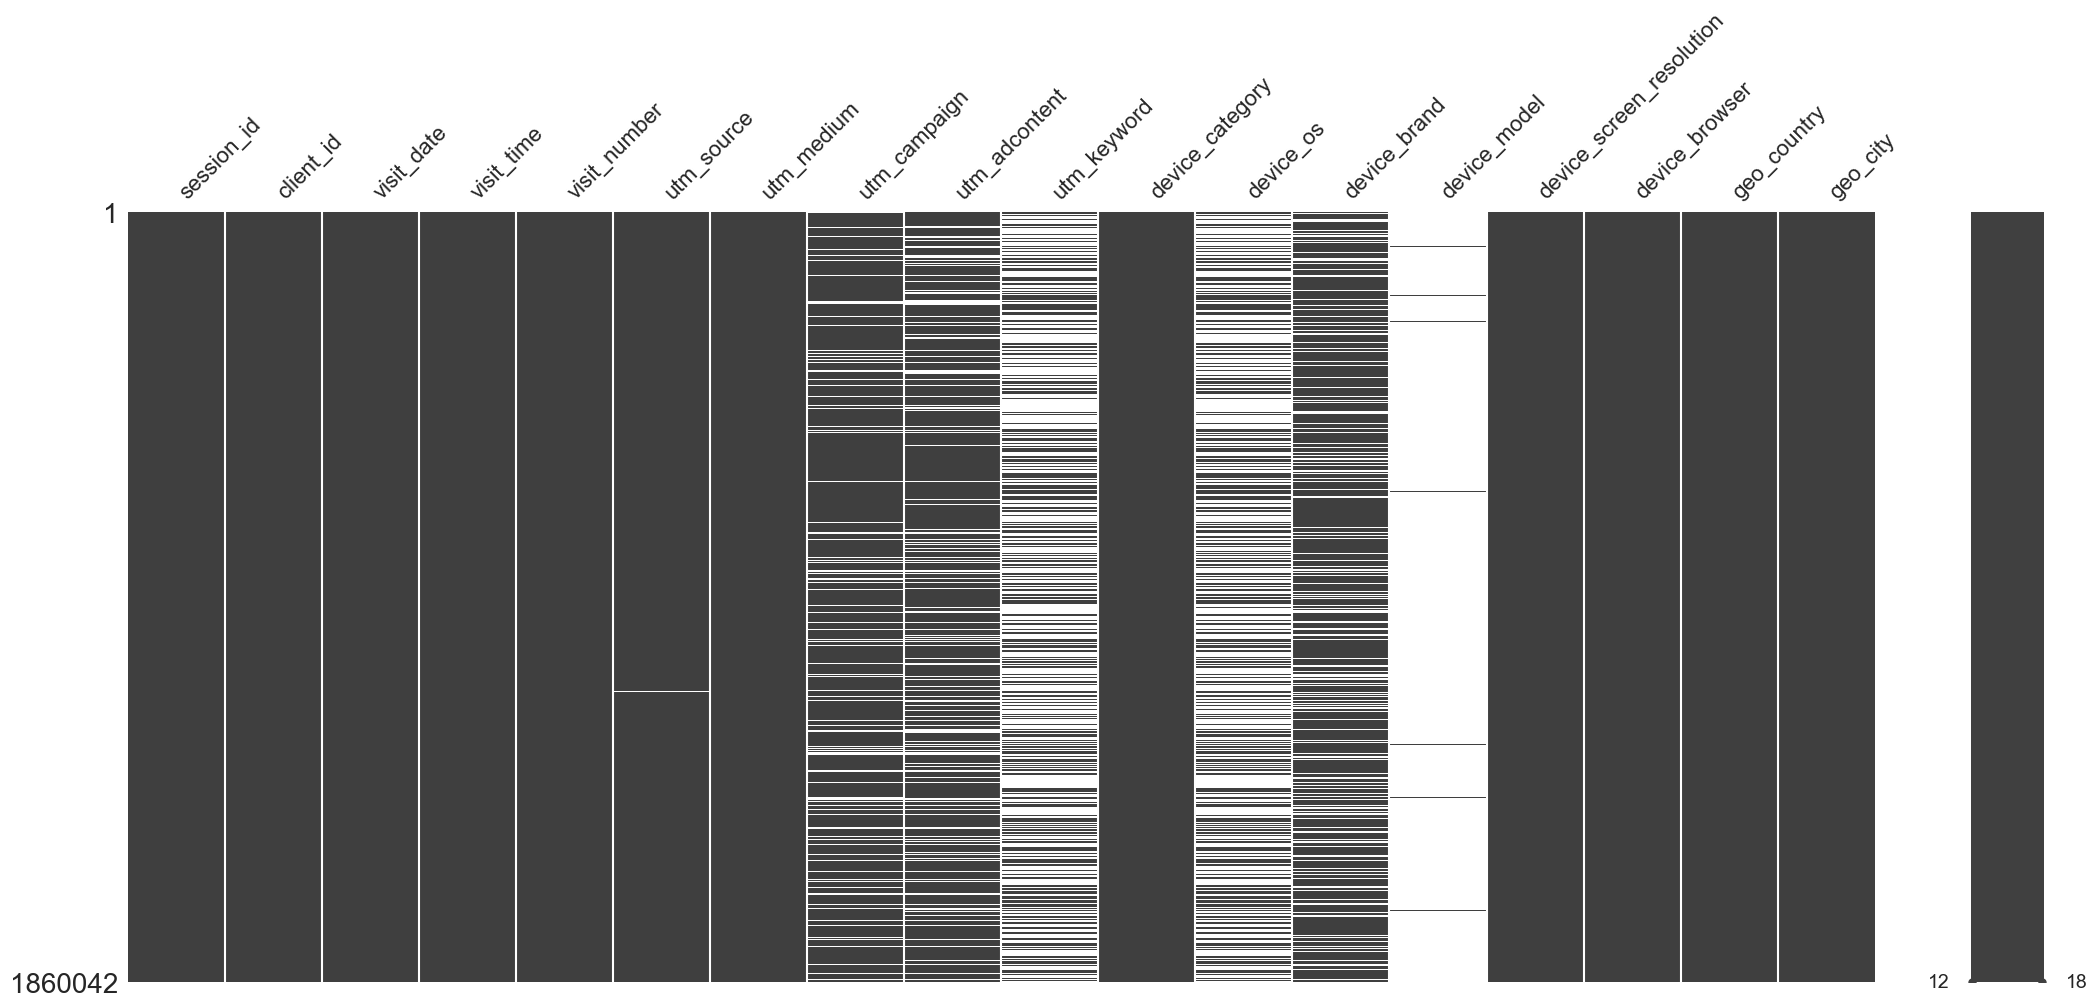

In [11]:
msno.matrix(sessions_df);

In [12]:
sessions_df_clean = sessions_df.copy()

In [13]:
sessions_df_clean.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [14]:
prep_utils.missing_values_percentage(sessions_df_clean)

Complete rows in percentage: 0.01
Missing values in percentage:
device_model     99.12
utm_keyword      58.17
device_os        57.53
device_brand     19.74
utm_adcontent    18.04
utm_campaign     11.81
utm_source        0.01
dtype: float64


In [15]:
sessions_df_clean[sessions_df_clean.device_model.notna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
62,9055656589238457290.1635504877.1635504877,2108434352.1635505098,2021-10-29,13:54:37,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Meizu,qBRdfuuhOnnqwSqNiPOv,360x744,Chrome,Russia,Moscow
65,905565998839028208.1635310063.1635310063,210843514.1635310064,2021-10-27,07:47:43,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,AshpvdJdReafUzEMmWGr,384x832,Android Webview,Russia,Saint Petersburg
66,905565998839028208.1636951969.1636951969,210843514.1635310064,2021-11-15,07:52:49,2,ISrKoXQCxqqYvAZICvjs,smm,NaN,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,AshpvdJdReafUzEMmWGr,384x832,Android Webview,Russia,Saint Petersburg
165,9056202067269505745.1640092368.1640092368,2108561356.1640092369,2021-12-21,16:12:48,1,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,384x854,Chrome,Russia,Moscow
208,9056422519349747445.1638964982.1638964982,2108612684.1638964981,2021-12-08,15:03:02,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,RrhnkuoaqckNtJpAZDzH,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,320x640,Chrome,Russia,Saint Petersburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859362,9052676375860711226.1639943995.1639943995,2107740467.1639943994,2021-12-19,22:59:55,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,393x873,Chrome,Russia,Izhevsk
1859404,9052904464392788371.1638799763.1638799763,2107793573.1638799763,2021-12-06,17:09:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Nokia,aCLaTVQlHcXbUnQYQvIg,412x892,Chrome,Russia,Novosibirsk
1859535,9053425229175288131.1636659526.1636659526,2107914823.1636659523,2021-11-11,22:38:46,1,faqsogjxCvbseFqupueU,banner,dZqEgyoxhtbeLFMtnnVR,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,385x769,Chrome,Russia,Samara
1859612,9053730012943175107.1640761072.1640761072,2107985786.1640320451,2021-12-29,09:57:52,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,360x760,Chrome,Russia,Vladivostok


In [16]:
sessions_df_clean.device_model.value_counts()

device_model
AuMdmADEIoPXiWpTsBEj    9778
tWBQlsvNfHxRUjaPAfhd     653
cwMJxNXiWUgMUxGiCTPs     651
pTgAEPipQxDXCjPrJbHo     461
FJApgTrMAGHoxCxQVKws     372
                        ... 
foPJGhraIZhogREKtYLR       1
qmRODeCJLlmkmwxNYXvp       1
MBGYWAQSYWUphNxTsAWD       1
aWSBcBZlKorTFjJGlWKG       1
VDidzTqFGxuqiRQJGrwB       1
Name: count, Length: 104, dtype: int64

In [17]:
sessions_df_clean = sessions_df_clean.drop(columns=['device_model'], axis=1)
prep_utils.missing_values_percentage(sessions_df_clean)

Complete rows in percentage: 0.31
Missing values in percentage:
utm_keyword      58.17
device_os        57.53
device_brand     19.74
utm_adcontent    18.04
utm_campaign     11.81
utm_source        0.01
dtype: float64


In [18]:
sessions_df_clean[sessions_df_clean.utm_source.isna()].head(20)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
77652,1100240274910044288.1640728207.1640728207,256169651.1637310592,2021-12-29,00:50:07,2,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,412x892,Chrome,Russia,Saint Petersburg
122841,1303431342277938317.1637250145.1637250145,303478758.1637239949,2021-11-18,18:42:25,3,NaN,Sbol_catalog,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x667,Safari,Russia,Balashikha
136220,1364914954463538089.1637595059.1637595059,317794027.1634397097,2021-11-22,18:30:59,8,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,YaBrowser,Russia,Moscow
136221,1364914954463538089.1638478637.1638478637,317794027.1634397097,2021-12-02,23:57:17,9,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,YaBrowser,Russia,Moscow
139706,1380043242326371104.1637518268.1637518268,321316356.1636477728,2021-11-21,21:11:08,4,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,360x740,Chrome,Russia,Izhevsk
168675,1509873377769628707.1640511648.1640511648,351544790.1640440867,2021-12-26,12:40:48,3,NaN,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,414x896,Safari,Russia,Moscow
173455,1531322904005943789.1639041942.1639041942,356538897.1639031277,2021-12-09,12:25:42,3,NaN,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,414x896,Safari,Russia,Moscow
242359,184033135453208477.1638708623.1638708623,42848553.1637285789,2021-12-05,15:50:23,2,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x780,Chrome,Russia,Novosibirsk
242360,184033135453208477.1638715082.1638715082,42848553.1637285789,2021-12-05,17:38:02,3,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x780,Chrome,Russia,Novosibirsk
248436,1868344538134532699.1636699405.1636699405,435007861.1636618843,2021-11-12,09:43:25,3,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,320x694,Chrome,Russia,Moscow


In [19]:
sessions_df_clean[(sessions_df_clean.utm_source.isna()) & (sessions_df_clean.visit_number == 1)]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city


In [20]:
sessions_df_clean[sessions_df_clean.utm_source.notna()].head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg
6,9055455318486370642.1640843788.1640843788,2108387490.1640843602,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,602x1029,YaBrowser,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg
8,9055462349345527315.1638536723.1638536723,2108389127.1638536723,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Moscow
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow


In [21]:
sessions_df_clean.utm_source = sessions_df_clean.utm_source.fillna('(not set)')
prep_utils.missing_values_percentage(sessions_df_clean)

Complete rows in percentage: 0.31
Missing values in percentage:
utm_keyword      58.17
device_os        57.53
device_brand     19.74
utm_adcontent    18.04
utm_campaign     11.81
dtype: float64


In [22]:
sessions_df_clean[sessions_df_clean.device_os.isna()].head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow


In [23]:
sessions_df_clean.device_os.value_counts()

device_os
Android          464054
iOS              207104
Windows           88307
Macintosh         24824
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: count, dtype: int64

In [24]:
brands_w_missing_os = sessions_df_clean[sessions_df_clean.device_os.isna()].device_brand.value_counts().to_dict()
brands_w_missing_os

{'Apple': 343990,
 'Samsung': 166510,
 'Xiaomi': 147224,
 'Huawei': 96135,
 'Realme': 8195,
 '(not set)': 7767,
 'OPPO': 6493,
 'OnePlus': 6310,
 'Vivo': 5723,
 'Asus': 4613,
 'Nokia': 3681,
 'Sony': 3601,
 'Google': 3138,
 'ZTE': 2971,
 'Meizu': 2142,
 'Lenovo': 1727,
 'LG': 1390,
 'Motorola': 1352,
 'Blackview': 1296,
 'Tecno': 932,
 'BQ': 670,
 'Alcatel': 500,
 'HTC': 461,
 'Oukitel': 414,
 'itel': 404,
 'DOOGEE': 399,
 'Umidigi': 336,
 'Mozilla': 284,
 'Ulefone': 256,
 'BlackBerry': 246,
 'LeEco': 167,
 'Philips': 150,
 'Infinix': 144,
 'Cubot': 142,
 'Vsmart': 127,
 'Sharp': 123,
 'Vertex': 101,
 'TP-Link': 93,
 'Leagoo': 93,
 'POCO': 91,
 'Prestigio': 81,
 'Micromax': 79,
 'DEXP': 77,
 'Neffos': 68,
 'Wileyfox': 66,
 'Hisense': 51,
 'CAT': 41,
 'HOMTOM': 40,
 'Highscreen': 38,
 'LeTV': 37,
 'TCL': 27,
 'Karbonn': 26,
 'Black Fox': 26,
 'Inoi': 24,
 'Acer': 23,
 'Coolpad': 22,
 'Fly': 20,
 'AGM': 20,
 'Vernee': 19,
 'Kyocera': 19,
 'Teclast': 18,
 'iNew': 18,
 'Chuwi': 17,
 'Nomu'

In [25]:
sessions_df_clean.loc[(sessions_df_clean.device_os.isna()) & (sessions_df_clean.device_brand == 'Apple'), 'device_os'] = 'iOS'

In [26]:
android_based = ['Samsung', 'Xiaomi', 'Huawei', 'Realme']
sessions_df_clean.loc[(sessions_df_clean.device_os.isna()) & (sessions_df_clean.device_brand.isin(android_based)), 'device_os'] = 'Android'

In [27]:
sessions_df_clean.device_os = sessions_df_clean.device_os.fillna('(not set)')

In [28]:
prep_utils.missing_values_percentage(sessions_df_clean)

Complete rows in percentage: 0.31
Missing values in percentage:
utm_keyword      58.17
device_brand     19.74
utm_adcontent    18.04
utm_campaign     11.81
dtype: float64


In [29]:
sessions_df_clean[sessions_df_clean.utm_keyword.isna()].head(20)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,iOS,Apple,375x812,Safari,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Samsung,360x640,Chrome,Russia,Saint Petersburg
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Samsung,412x915,Chrome,Russia,Moscow
10,9055466554104774132.1629442326.1629442326,2108390106.1624800756,2021-08-20,09:00:00,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Samsung,412x915,Chrome,Russia,Moscow
11,9055469620715506713.1628883994.1628883994,2108390820.1628883993,2021-08-13,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg
12,9055469620715506713.1633110583.1633110583,2108390820.1628883993,2021-10-01,20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg
14,9055469620715506713.1636559415.1636559415,2108390820.1628883993,2021-11-10,18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,NaN,NaN,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg
15,9055476398179250925.1634235280.1634235280,2108392398.1634235117,2021-10-14,21:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Samsung,412x915,Chrome,Russia,Yaroslavl


In [30]:
sessions_df_clean[sessions_df_clean.utm_keyword.notna()].head(20)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
6,9055455318486370642.1640843788.1640843788,2108387490.1640843602,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,602x1029,YaBrowser,Russia,Saint Petersburg
8,9055462349345527315.1638536723.1638536723,2108389127.1638536723,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Moscow
13,9055469620715506713.1635878177.1635878177,2108390820.1628883993,2021-11-02,21:36:17,3,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x869,Android Webview,Russia,Sochi
16,9055487268745225369.1637983385.1637983385,2108394929.1637983385,2021-11-27,06:23:05,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,320x568,Safari,Russia,Saint Petersburg
18,9055488359664698205.1635763037.1635763037,2108395183.1635763037,2021-11-01,13:37:17,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,320x693,Safari,Russia,(not set)
19,9055491722626447422.1638119489.1638119489,2108395966.1638119486,2021-11-28,20:11:29,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg
27,9055504865227535872.1639282176.1639282176,2108399026.1639282176,2021-12-12,07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,okTXSMadDkjvntEHzIjp,mobile,Android,Samsung,385x854,Chrome,Russia,Moscow


In [31]:
utm_keyword_values = sessions_df_clean.utm_keyword.value_counts(dropna=False).to_dict()
utm_keyword_values

{nan: 1082061,
 'puhZPIYqKXeFPaUviSjo': 506819,
 'aXQzDWsJuGXeBXexNHjc': 24241,
 'pHqgLcdBQPSLcrTpLkdr': 13767,
 'ITfrGJNwVsHBGJMAKoct': 13353,
 'hAmNSZmQkKQKAjZEGlgb': 11297,
 'UKNBOHebRIIsQRsjNKay': 10946,
 'IGUCNvHlhfHpROGclCit': 7568,
 'RkpOyeEPgcMBSDuHLQcj': 6978,
 'JajANoFxoqXfKRNBUhzx': 6758,
 'BmOOOIoWGHEfxEfoUezs': 6602,
 'ZNhSIPchlbnKwZWcsKzz': 5661,
 'pucKZkLDtpMDBTobJAJG': 5391,
 'RrhnkuoaqckNtJpAZDzH': 5004,
 'YQXPpoLsxnykCWKhGEmI': 4874,
 'DBHgBJHOdbPwsRDUbEgX': 4472,
 'tVtbIKrPSOvrXLCznVVe': 3711,
 'XEayFbemrPYbxFeNbxif': 3695,
 'MWLEpQPyjGkjHseVyeyQ': 3156,
 'fzbotReoFzSuckjwcpCs': 2965,
 'COtBsnAzfZyRVtvDlhnW': 2785,
 'tzIeQUUHahhBuEkJqDVp': 2699,
 'QYfbqJXuLdJGfOSFgZOs': 2674,
 'KCcEkEaKEtUilBVMoCAi': 2637,
 'ISrKoXQCxqqYvAZICvjs': 2559,
 'psjAUzFZVWWCuxgCrtmQ': 2546,
 'qxnAydKMtMSuafVrMzdC': 2539,
 'ObIWuFTMgFPUHNiFoOwb': 2491,
 'MBHgRPNeTcONuVFFXgmz': 2476,
 'oKjXDUsycmahkgMhGdAR': 2387,
 'qUcotcWimEOQiboVPcCx': 2385,
 'jfLxUKobDdJlutbwyjaU': 2367,
 'fkhLOTqvIJxkHks

In [32]:
sessions_df_clean.utm_keyword = sessions_df_clean.utm_keyword.fillna('(not set)')
prep_utils.missing_values_percentage(sessions_df_clean)

Complete rows in percentage: 0.66
Missing values in percentage:
device_brand     19.74
utm_adcontent    18.04
utm_campaign     11.81
dtype: float64


In [33]:
sessions_df_clean[sessions_df_clean.utm_adcontent.isna()].head(20)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,(not set),mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
14,9055469620715506713.1636559415.1636559415,2108390820.1628883993,2021-11-10,18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,NaN,(not set),mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg
27,9055504865227535872.1639282176.1639282176,2108399026.1639282176,2021-12-12,07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,okTXSMadDkjvntEHzIjp,mobile,Android,Samsung,385x854,Chrome,Russia,Moscow
37,905553874150070422.1639028885.1639028885,210840691.1639028886,2021-12-09,08:48:05,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow
38,905553874150070422.1639028922.1639028922,210840691.1639028886,2021-12-09,08:48:42,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow
39,905553874150070422.1639041598.1639041598,210840691.1639028886,2021-12-09,12:19:58,4,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow
40,905553874150070422.1639045262.1639045262,210840691.1639028886,2021-12-09,13:21:02,5,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow
41,905553874150070422.1639045289.1639045289,210840691.1639028886,2021-12-09,13:21:29,6,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow
48,9055589742366452530.1634495284.1634495284,2108418788.1634495282,2021-10-17,21:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,(not set),mobile,Android,Samsung,339x716,Chrome,Russia,Reutov
50,9055614631691441353.1624003785.1624003785,2108424583.1624003785,2021-06-18,11:00:00,1,QxAxdyPLuQMEcrdZWdWb,cpc,PXQWdUxeUoXfoKzTBGpY,NaN,(not set),mobile,iOS,Apple,390x844,Safari (in-app),Russia,Saint Petersburg


In [34]:
sessions_df_clean.utm_adcontent = sessions_df_clean.utm_adcontent.fillna('(not set)')
sessions_df_clean.utm_campaign = sessions_df_clean.utm_campaign.fillna('(not set)')
prep_utils.missing_values_percentage(sessions_df_clean)

Complete rows in percentage: 0.8
Missing values in percentage:
device_brand    19.74
dtype: float64


In [35]:
sessions_df_clean[sessions_df_clean.device_brand.isna()].head(20)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
28,9055505230298952295.1638478433.1638478433,2108399111.1638478439,2021-12-02,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1536x864,Chrome,Russia,Balashikha
63,9055657327967035032.1629707931.1629707931,2108434524.1629707928,2021-08-23,11:00:00,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,(not set),desktop,(not set),NaN,1920x1080,YaBrowser,Russia,Moscow
64,905565977351442956.1622561294.1622561294,210843509.1622561292,2021-06-01,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,(not set),desktop,(not set),NaN,1920x1080,Chrome,Russia,Moscow
67,9055678214400253418.1636965866.1636965866,2108439387.1636965866,2021-11-15,11:44:26,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1920x1080,Chrome,Russia,Saint Petersburg
73,9055788191321875859.1626006934.1626006934,2108464993.1626006931,2021-07-11,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,(not set),desktop,(not set),NaN,1280x720,Chrome,Russia,Moscow
74,9055788191321875859.1627377569.1627377569,2108464993.1626006931,2021-07-27,12:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,nSReTmyFtbSjlPrTKoaX,JNHcPlZPxEMWDnRiyoBf,(not set),desktop,(not set),NaN,1920x1080,Chrome,Russia,Moscow
78,9055794766915104430.1624305327.1624305327,2108466524.1624305326,2021-06-21,22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,(not set),(not set),(not set),desktop,(not set),NaN,834x1112,Safari,Russia,Domodedovo
79,9055795561498027164.1638278300.1638278300,2108466709.1638278300,2021-11-30,16:18:20,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,jpZoxCaowxXvglZVUJyq,desktop,Windows,NaN,1680x1050,Chrome,Russia,Moscow
80,9055795780529779605.1626698645.1626698645,2108466760.1626698645,2021-07-19,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,(not set),desktop,(not set),NaN,1920x1080,Chrome,Russia,Yoshkar-Ola
84,9055836346500322990.1631131310.1631131310,2108476205.1631131310,2021-09-08,23:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,(not set),desktop,(not set),NaN,1440x900,Safari,Russia,Saint Petersburg


In [36]:
sessions_df_clean.device_brand = sessions_df_clean.device_brand.fillna('(not set)')
prep_utils.missing_values_percentage(sessions_df_clean)

Complete rows in percentage: 1.0
Missing values in percentage:
Series([], dtype: float64)


**Data Preparation**
<br>
*Hits dataframe*

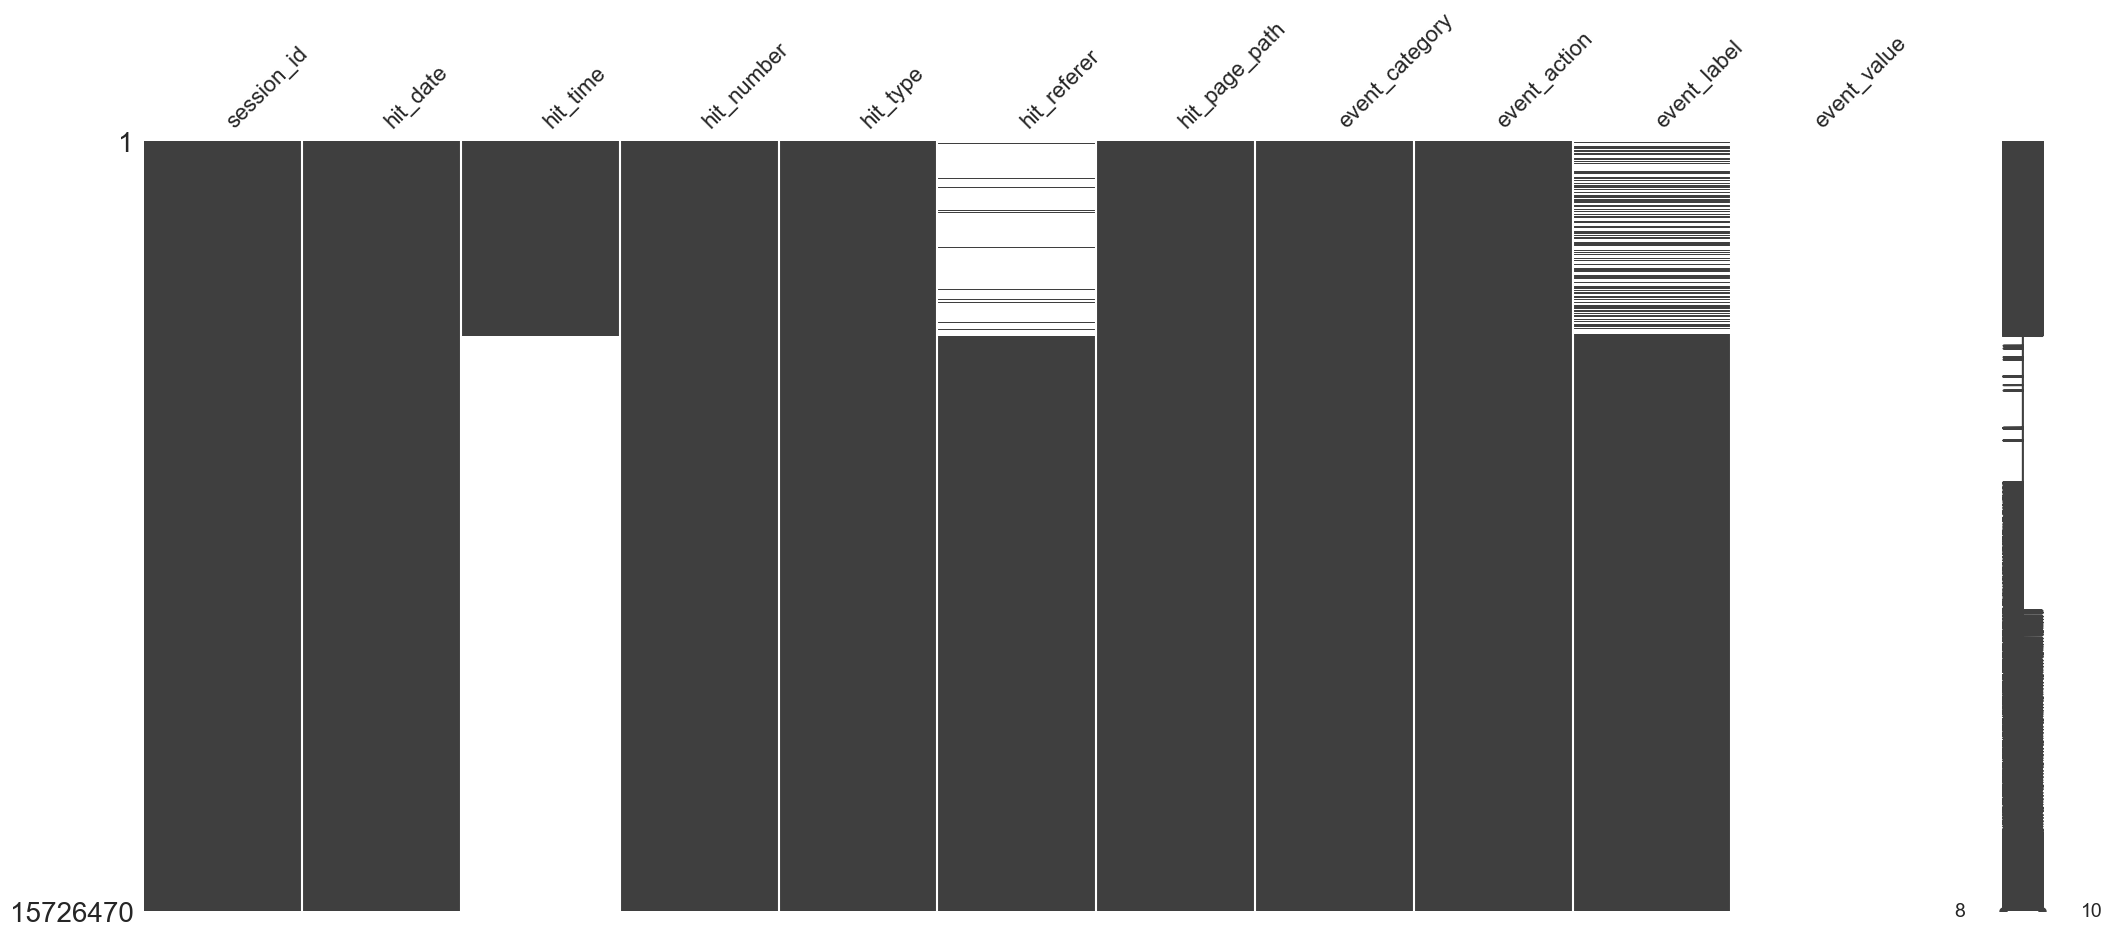

In [37]:
msno.matrix(hits_df);

In [38]:
hits_df.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [39]:
prep_utils.missing_values_percentage(hits_df)

Complete rows in percentage: 0.0
Missing values in percentage:
event_value    100.00
hit_time        58.25
hit_referer     39.90
event_label     23.91
dtype: float64


In [48]:
target_events = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

hits_df['target_event'] = hits_df.event_action.apply(lambda x: 1 if x in target_events else 0)
hits_df['CR'] = hits_df.groupby('session_id')['target_event'].transform('max')
hits_df['CR'] = hits_df['CR'].astype('int')
hits_df.head()

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,target_event,CR
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,(not set),sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,(not set),0,0
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,(not set),sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,(not set),0,0
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,(not set),sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,(not set),0,0
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,(not set),sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,(not set),0,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,(not set),sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,(not set),0,0


In [49]:
hits_df.CR.value_counts()

CR
0    14441523
1     1284947
Name: count, dtype: int64

In [50]:
unique_hits_cr = hits_df[['session_id', 'CR']].drop_duplicates(subset='session_id', keep='first')
sessions_w_cr = sessions_df_clean.merge(unique_hits_cr, on='session_id', how='inner')
sessions_w_cr.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,(not set),NOBKLgtuvqYWkXQHeYWM,(not set),mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,(not set),(not set),(not set),mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [51]:
prep_utils.print_basic_stats(df=sessions_w_cr, level='shape')

Number of rows: 1732266
Number of columns: 18


In [52]:
sessions_w_cr.to_csv('data/clean_data/clean_sessions_with_cr.csv', index=False)

**Data Preparation**
<br>
*Data Cleaning*
<br>
*Removing Irrelevant Features*

In [53]:
df = sessions_w_cr.copy()

Task specified which columns must be passed to model, so other irrelevant columns will be dropped.

In [54]:
columns_to_drop = ['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number']
df = df.drop(columns=columns_to_drop)
df.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,kjsLglQLzykiRbcDiGcD,cpc,(not set),NOBKLgtuvqYWkXQHeYWM,(not set),mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,kjsLglQLzykiRbcDiGcD,cpc,(not set),(not set),(not set),mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [55]:
df.to_csv('data/clean_data/clean_sessions_with_cr.csv', index=False)